# Names and IDs
 1. Ofek Vilkerston, 212712608
 2. Maayan Weizman, 213089089

---
# Section 1
---

# I. Naive Bayes (40 pts)

In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model), in contrast to the Multivariate Logistic Regression (a discriminative model) we saw.

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use

```
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
```

To fetch the original data. Each image is a 28 by 28 pixels in grayscale range [0,255] and the corresponding label is an integer $y\in [0,9]$. Each image should be transformed into a 1D integer array $x\in [0,255]^{784}$.

```
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
```

Divide your data into train and test sets in a 80-20 ration split. And plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

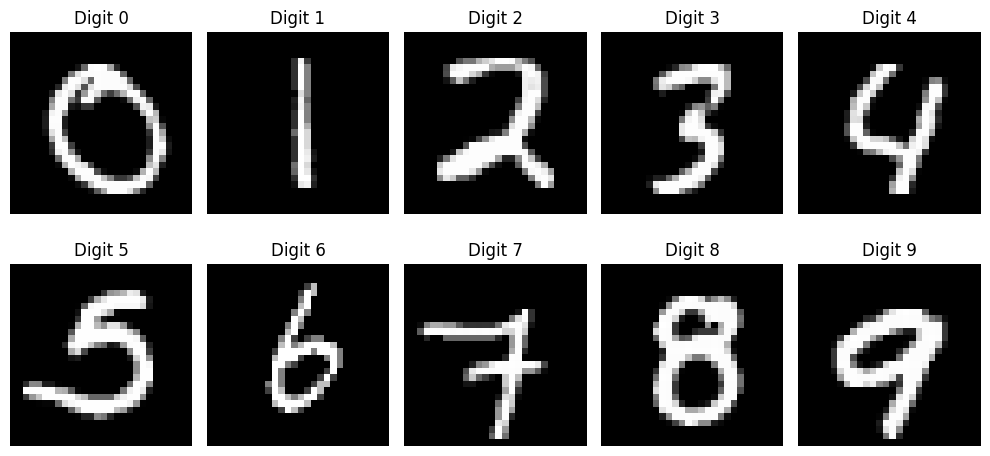

In [23]:
# Import
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

## Concate and then resplit in 8:2 ratio
X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    digit_indices = np.where(y_train == i)[0]
    random_index = np.random.choice(digit_indices)
    digit_image = X_train[random_index].reshape(28, 28)
    plt.imshow(digit_image, cmap='gray')
    plt.title(f"Digit {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()


### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that the probability of a pixel $i$ to be on given that the digit is $j$ is:
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Research the differences between the three types of Naive Bayes classifiers: Bernoulli NB, Multinomial NB, and Gaussian NB.
Describe in your own words what makes each type unique and specify the kind of tasks for which you would prefer each one.

#### Answer 1

Each of the theree designed for different data types. Bernoulli NB is for , Multinomial NB, and Gaussian NB

#### Question 2
Train a Naive Bayes classifier using the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this purpose, use the `binarize` parameter of the `BernoulliNB` function. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

    A **confusion matrix** for a multi-class classifier is a table that summarizes the performance of the model by comparing the predicted class labels to the true class labels: Each row represents the actual class, and each column represents the predicted class. The diagonal elements indicate the number of correct predictions for each class. Off-diagonal elements show misclassifications (e.g., how many times one class was predicted as another).


2. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**

#### Answer 2
Put you answer here...

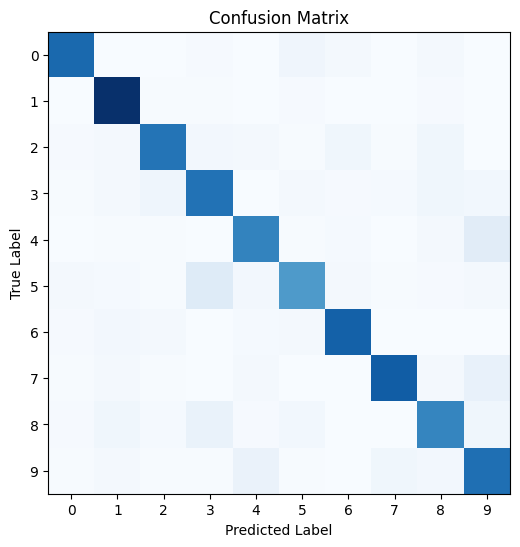

Total Accuracy: 83.49%
TODO: Summarize the result


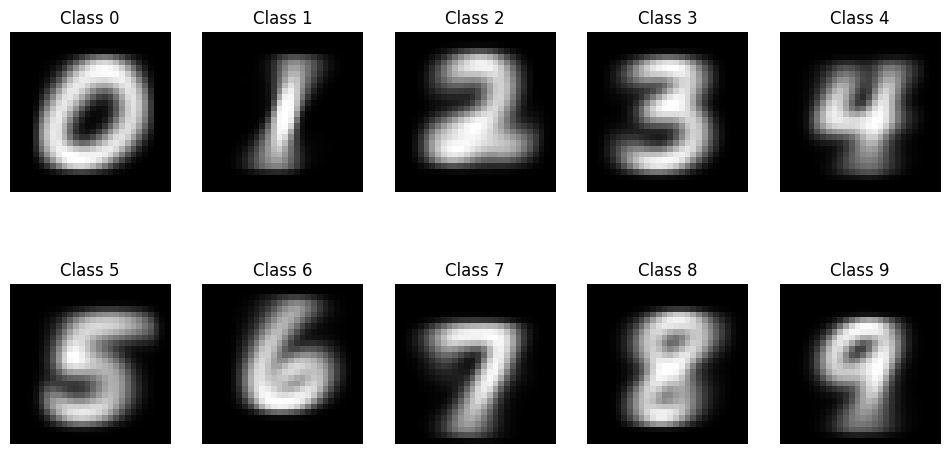

In [24]:
# code goes here
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Train
model = BernoulliNB(binarize=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar
plt.xticks(np.arange(10), np.arange(10))
plt.yticks(np.arange(10), np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate the total accuracy (fraction of correctly classified images)
accuracy = accuracy_score(y_test, y_pred)
print(f"Total Accuracy: {accuracy * 100:.2f}%")
print("TODO: Summarize the result")

# Mean Plot
mean_images = np.exp(model.feature_log_prob_)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    row, col = i // 5, i % 5
    axes[row, col].imshow(mean_images[i].reshape(28, 28), cmap='gray')
    axes[row, col].set_title(f'Class {i}')
    axes[row, col].axis('off')
plt.show()


3. We can find the optimal threshold for binarization by...



---
# Section 2 - Kaggle competition
---

# miRNA animals interaction prediction (60 pts)
In this section, you will explain the tools and methods you used in the competition. Fifty points will be given according to the explanations of the section and up to ten points according to your relative position in the competition. Participate in the following contest and answer the following questions:
https://www.kaggle.com/t/ae45745d840546ffa91755d7a06af0d7

In this section you are allow to use only Decision Tree as your ML model.



In [25]:
# imports
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder,PowerTransformer, QuantileTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score,
    precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, RFE,VarianceThreshold, mutual_info_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from scipy import stats
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')


In [26]:
# data import
drive.mount('/content/drive')
x_train = pd.read_csv("/content/drive/Shareddrives/ML/x_train.csv", index_col="id")
y_train = pd.read_csv("/content/drive/Shareddrives/ML/y_train.csv", index_col="id")

x_test = pd.read_csv("/content/drive/Shareddrives/ML/x_test.csv", index_col="id")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### EDA - Exploratory Data Analysis (10 pts):
Use any visual tools to present and explain the data. Your answer must include statistics, images, and conclusions.

***Write your code below***


Auto-detected target column: label
Merging X_df ((9055, 592)) and y_df ((9055, 1)) on 'id'...
Merged dataset shape: (9055, 593)

1. DATASET OVERVIEW
----------------------------------------
Shape: (9055, 593)

Data Types:
  float64: 569 columns
  object: 24 columns

2. MISSING VALUES ANALYSIS
Columns with missing values: 593
                                   Missing_Count  Missing_Percentage
Acc_P21_6th                                 2841           31.374931
MRNA_Up_CU_comp                             2829           31.242408
Acc_P6_2th                                  2825           31.198233
Acc_P12_5th                                 2823           31.176146
HotPairingMirna_he_P3_L2                    2813           31.065710
Acc_P30_7th                                 2811           31.043622
miRNAMatchPosition_15                       2808           31.010491
Acc_P12_3th                                 2806           30.988404
miRNAPairingCount_Total_mir_bulge           2804    

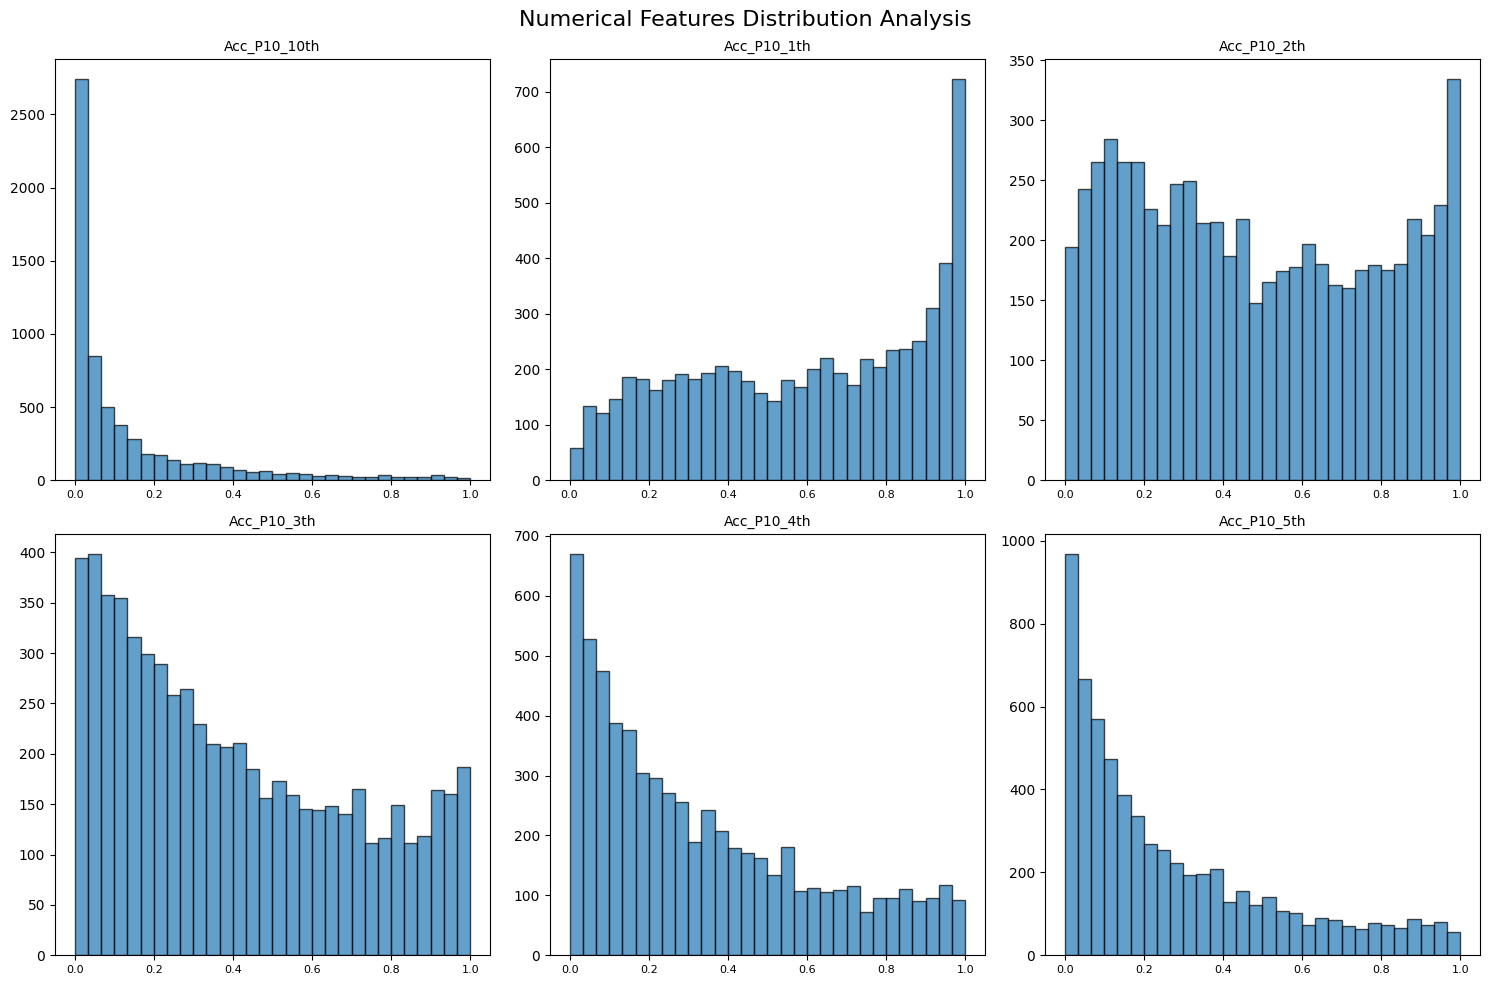


5. CATEGORICAL FEATURES ANALYSIS (24 features)
Seed_match_canonical: 2 unique values
  Values: {False: 4762, True: 1567}
Seed_match_noncanonical: 2 unique values
  Values: {False: 4298, True: 1975}
miRNAMatchPosition_1: 5 unique values
  Values: {'MM': 4399, 'AU': 1456, 'GU': 345, 'GC': 88, 'BB': 32}
miRNAMatchPosition_10: 5 unique values
  Values: {'MM': 2296, 'AU': 1768, 'GC': 1360, 'BB': 490, 'GU': 361}
miRNAMatchPosition_11: 5 unique values
  Values: {'GC': 2461, 'MM': 1824, 'AU': 1035, 'GU': 533, 'BB': 485}

6. CORRELATION ANALYSIS
----------------------------------------


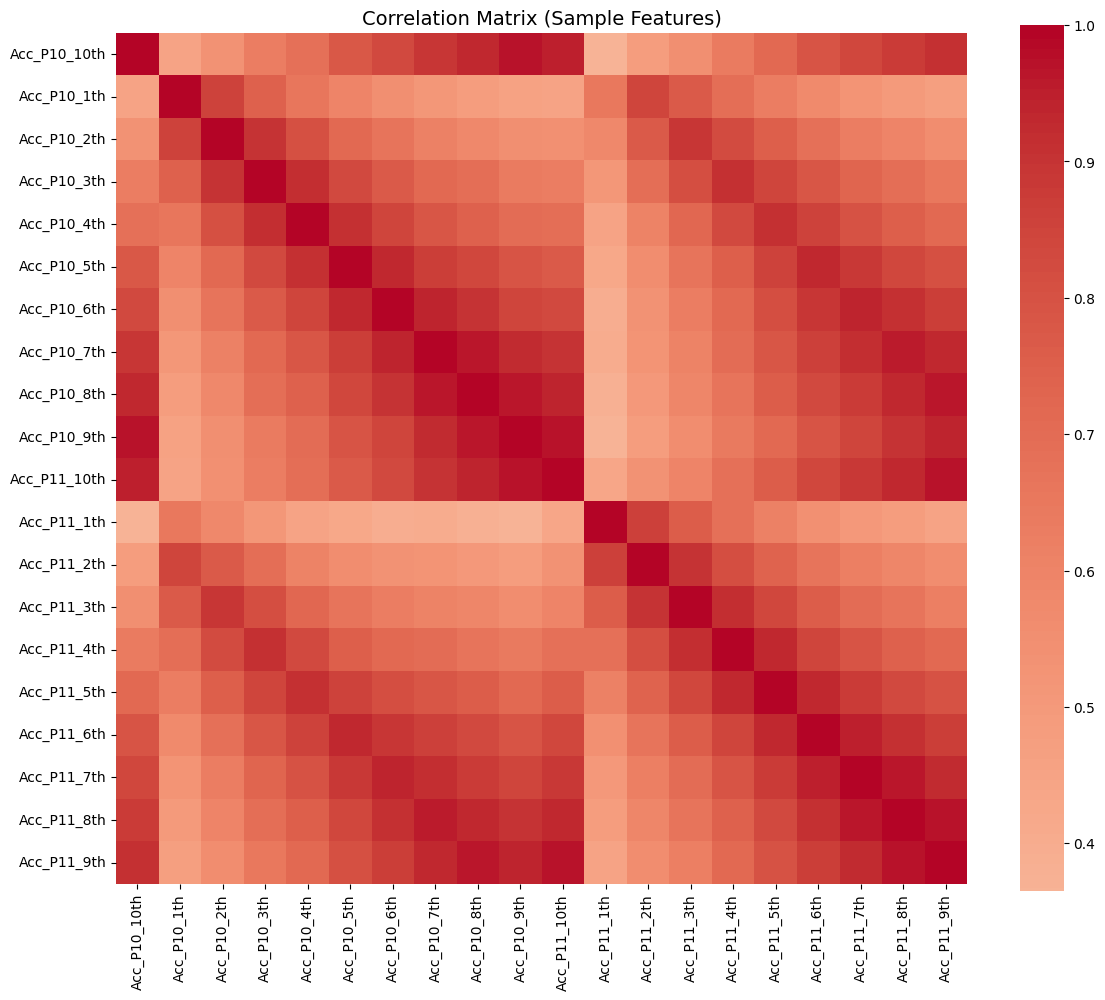


7. FEATURE VARIANCE ANALYSIS
----------------------------------------
Zero variance features: 18
Low variance features (var < 0.01): 61
Zero variance features: ['HotPairingMRNA_he_P5_L5', 'HotPairingMRNA_he_P4_L5', 'HotPairingMRNA_he_P1_L5', 'HotPairingMRNA_he_P2_L5', 'HotPairingMRNA_he_P3_L5', 'HotPairingMRNA_he_P6_L5', 'HotPairingMirna_he_P6_L5', 'HotPairingMirna_he_P7_L5', 'HotPairingMirna_he_P5_L5', 'HotPairingMirna_he_P4_L5']

8. TARGET VARIABLE ANALYSIS: label
----------------------------------------
Target statistics:
count    6363.000000
mean        2.363822
std         1.105326
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: label, dtype: float64


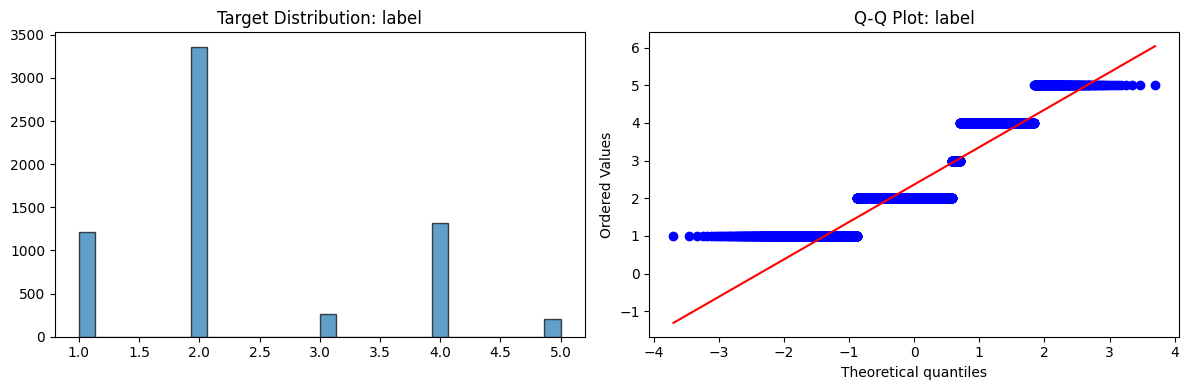


9. DATA QUALITY RECOMMENDATIONS
----------------------------------------
1. Remove 18 zero-variance features
2. Consider feature selection - 3317 highly correlated pairs found
3. Handle missing values in 593 columns
4. Consider dimensionality reduction techniques (PCA, feature selection)

EDA COMPLETE


In [27]:


def comprehensive_eda(X_df, y_df=None, id_col='id', target_col=None, sample_size=None, figsize=(15, 10)):
    """

    Parameters:
    -----------
    X_df : pandas.DataFrame
        The features dataset (X_train)
    y_df : pandas.DataFrame, optional
        The target dataset (y_train) - will be merged with X_df using id_col
    id_col : str, default 'id'
        Name of the ID column for merging X and y datasets
    target_col : str, optional
        Name of target variable column in y_df for supervised analysis
    sample_size : int, optional
        Number of rows to sample for analysis (useful for large datasets)
    figsize : tuple, default (15, 10)
        Figure size for plots

    Returns:
    --------
    dict : Dictionary containing analysis results and statistics
    """
    # Merge datasets if y_df is provided
    if y_df is not None:
        if target_col is None:
            # Auto-detect target column (assume it's the non-ID column in y_df)
            target_col = [col for col in y_df.columns if col != id_col][0]
            print(f"Auto-detected target column: {target_col}")

        # Merge X and y on ID column
        print(f"Merging X_df ({X_df.shape}) and y_df ({y_df.shape}) on '{id_col}'...")
        df_analysis = X_df.merge(y_df, on=id_col, how='inner')
        print(f"Merged dataset shape: {df_analysis.shape}")

        if df_analysis.shape[0] < X_df.shape[0]:
            print(f"Warning: Lost {X_df.shape[0] - df_analysis.shape[0]} rows during merge")
    else:
        df_analysis = X_df.copy()
        print(f"Analyzing features dataset only: {df_analysis.shape}")

    # Sample data if specified
    if sample_size and sample_size < len(df_analysis):
        df_analysis = df_analysis.sample(n=sample_size, random_state=42)
        print(f"Analyzing sample of {sample_size} rows from {len(df_analysis)} total rows")

    results = {}

    # 1. BASIC DATASET INFORMATION
    print("\n1. DATASET OVERVIEW")
    print("-" * 40)
    print(f"Shape: {df_analysis.shape}")

    # Data types breakdown
    dtype_counts = df_analysis.dtypes.value_counts()
    print(f"\nData Types:")
    for dtype, count in dtype_counts.items():
        print(f"  {dtype}: {count} columns")

    results['basic_info'] = {
        'shape': df_analysis.shape,
        'dtypes': dtype_counts.to_dict(),
        'memory_mb': df_analysis.memory_usage(deep=True).sum() / 1024**2
    }

    # 2. MISSING VALUES ANALYSIS
    print("\n2. MISSING VALUES ANALYSIS")
    missing_stats = df_analysis.isnull().sum()
    missing_pct = (missing_stats / len(df_analysis)) * 100
    missing_df = pd.DataFrame({
        'Missing_Count': missing_stats,
        'Missing_Percentage': missing_pct
    }).sort_values('Missing_Count', ascending=False)

    cols_with_missing = missing_df[missing_df['Missing_Count'] > 0]
    if len(cols_with_missing) > 0:
        print(f"Columns with missing values: {len(cols_with_missing)}")
        print(cols_with_missing.head(10))

    results['missing_values'] = missing_df

    # 3. FEATURE CATEGORIZATION (based on column naming patterns)
    print("\n3. FEATURE CATEGORIZATION")

    feature_categories = {
        'accessibility': [col for col in df_analysis.columns if col.startswith('Acc_')],
        'energy': [col for col in df_analysis.columns if col.startswith('Energy_')],
        'hot_pairing_mrna': [col for col in df_analysis.columns if col.startswith('HotPairingMRNA_')],
        'hot_pairing_mirna': [col for col in df_analysis.columns if col.startswith('HotPairingMirna_')],
        'mrna_features': [col for col in df_analysis.columns if col.startswith('MRNA_')],
        'seed_match': [col for col in df_analysis.columns if col.startswith('Seed_match_')],
        'mirna_position': [col for col in df_analysis.columns if col.startswith('miRNAMatchPosition_')],
        'pairing_counts': [col for col in df_analysis.columns if col.startswith('miRNAPairingCount_')],
        'other': []
    }

    # Categorize remaining columns
    categorized_cols = set()
    for category, cols in feature_categories.items():
        categorized_cols.update(cols)

    feature_categories['other'] = [col for col in df_analysis.columns if col not in categorized_cols]

    for category, cols in feature_categories.items():
        if cols:
            print(f"{category.upper()}: {len(cols)} features")

    results['feature_categories'] = feature_categories

    # 4. NUMERICAL FEATURES ANALYSIS
    numerical_cols = df_analysis.select_dtypes(include=[np.number]).columns.tolist()
    if id_col in numerical_cols:
        numerical_cols.remove(id_col)  # Remove ID column
    results['numerical_cols'] = numerical_cols


    print(f"\n4. NUMERICAL FEATURES ANALYSIS ({len(numerical_cols)} features)")
    if numerical_cols:
        num_stats = df_analysis[numerical_cols].describe()
        print("Summary Statistics (first 5 features):")
        print(num_stats.iloc[:, :5])

        # Distribution analysis
        fig, axes = plt.subplots(2, 3, figsize=figsize)
        fig.suptitle('Numerical Features Distribution Analysis', fontsize=16)

        # Sample some features for visualization
        sample_features = numerical_cols[:6] if len(numerical_cols) >= 6 else numerical_cols

        for i, col in enumerate(sample_features):
            if i < 6:
                row, col_idx = i // 3, i % 3
                axes[row, col_idx].hist(df_analysis[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
                axes[row, col_idx].set_title(f'{col}', fontsize=10)
                axes[row, col_idx].tick_params(axis='x', labelsize=8)

        # Remove empty subplots
        for i in range(len(sample_features), 6):
            row, col_idx = i // 3, i % 3
            fig.delaxes(axes[row, col_idx])

        plt.tight_layout()
        plt.show()

        results['numerical_stats'] = num_stats

    # 5. CATEGORICAL FEATURES ANALYSIS
    categorical_cols = df_analysis.select_dtypes(include=['object']).columns.tolist()
    results['categorical_cols'] = categorical_cols
    print(f"\n5. CATEGORICAL FEATURES ANALYSIS ({len(categorical_cols)} features)")

    if categorical_cols:
        for col in categorical_cols[:5]:  # Show first 5 categorical columns
            unique_vals = df_analysis[col].nunique()
            print(f"{col}: {unique_vals} unique values")
            if unique_vals <= 10:
                print(f"  Values: {df_analysis[col].value_counts().to_dict()}")

        results['categorical_info'] = {col: df_analysis[col].value_counts().to_dict()
                                     for col in categorical_cols}

    # 6. CORRELATION ANALYSIS (for numerical features)
    if len(numerical_cols) > 1:
        print(f"\n6. CORRELATION ANALYSIS")
        print("-" * 40)

        corr_matrix = df_analysis[numerical_cols].corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
        results['columns_to_drop_correlation'] = to_drop

        # Drop highly correlated
        # Find highly correlated pairs
        high_corr_pairs = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                corr_val = corr_matrix.iloc[i, j]
                if abs(corr_val) > 0.8:  # High correlation threshold
                    high_corr_pairs.append((corr_matrix.columns[i],
                                          corr_matrix.columns[j],
                                          corr_val))


        # Plot correlation heatmap for sample features
        plt.figure(figsize=(12, 10))
        sample_corr = corr_matrix.iloc[:20, :20] if corr_matrix.shape[0] > 20 else corr_matrix
        sns.heatmap(sample_corr, annot=False, cmap='coolwarm', center=0, square=True)
        plt.title('Correlation Matrix (Sample Features)', fontsize=14)
        plt.tight_layout()
        plt.show()

        results['high_correlations'] = high_corr_pairs

    # 7. FEATURE VARIANCE ANALYSIS
    if numerical_cols:
        print(f"\n7. FEATURE VARIANCE ANALYSIS")
        print("-" * 40)

        variances = df_analysis[numerical_cols].var().sort_values(ascending=False)
        zero_var_features = variances[variances == 0]
        low_var_features = variances[(variances > 0) & (variances < 0.01)]

        print(f"Zero variance features: {len(zero_var_features)}")
        print(f"Low variance features (var < 0.01): {len(low_var_features)}")

        if len(zero_var_features) > 0:
            print("Zero variance features:", list(zero_var_features.index[:10]))

        results['variance_analysis'] = {
            'zero_variance': list(zero_var_features.index),
            'low_variance': list(low_var_features.index)
        }

    # 8. TARGET VARIABLE ANALYSIS (if provided)
    if target_col and target_col in df_analysis.columns:
        print(f"\n8. TARGET VARIABLE ANALYSIS: {target_col}")
        print("-" * 40)

        if df_analysis[target_col].dtype in ['object', 'category']:
            # Categorical target
            target_counts = df_analysis[target_col].value_counts()
            print("Target distribution:")
            print(target_counts)

            # Plot target distribution
            plt.figure(figsize=(8, 6))
            target_counts.plot(kind='bar')
            plt.title(f'Target Variable Distribution: {target_col}')
            plt.xlabel(target_col)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        else:
            # Numerical target
            print(f"Target statistics:")
            print(df_analysis[target_col].describe())

            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            plt.hist(df_analysis[target_col].dropna(), bins=30, alpha=0.7, edgecolor='black')
            plt.title(f'Target Distribution: {target_col}')

            plt.subplot(1, 2, 2)
            stats.probplot(df_analysis[target_col].dropna(), dist="norm", plot=plt)
            plt.title(f'Q-Q Plot: {target_col}')
            plt.tight_layout()
            plt.show()

    # 9. RECOMMENDATIONS
    print(f"\n9. DATA QUALITY RECOMMENDATIONS")
    print("-" * 40)

    recommendations = []

    if len(zero_var_features) > 0:
        recommendations.append(f"Remove {len(zero_var_features)} zero-variance features")

    if len(high_corr_pairs) > 10:
        recommendations.append(f"Consider feature selection - {len(high_corr_pairs)} highly correlated pairs found")

    if len(cols_with_missing) > 0:
        recommendations.append(f"Handle missing values in {len(cols_with_missing)} columns")

    if len(numerical_cols) > 100:
        recommendations.append("Consider dimensionality reduction techniques (PCA, feature selection)")

    if not recommendations:
        recommendations.append("Dataset appears to be in good shape for analysis!")

    for i, rec in enumerate(recommendations, 1):
        print(f"{i}. {rec}")

    results['recommendations'] = recommendations

    print(f"\n{'='*80}")
    print("EDA COMPLETE")
    print(f"{'='*80}")

    return results

eda_results = comprehensive_eda(x_train, y_train)


In [28]:
# Select categorical columns from x_train
categorical_cols = x_train.select_dtypes(include=['object']).columns

# Create a DataFrame with only the categorical columns
x_train_categorical = x_train[categorical_cols]

# Concatenate the categorical features and the labels
# Assuming y_train is already aligned with x_train by index
categorical_and_labels = pd.concat([x_train_categorical, y_train], axis=1)

# Define the output CSV file name
output_csv_file = 'categorical_features_and_labels.csv'

# Write to CSV
categorical_and_labels.to_csv(output_csv_file, index=True) # Keep index if 'id' is the index

print(f"Categorical features and labels saved to {output_csv_file}")

Categorical features and labels saved to categorical_features_and_labels.csv


DATA QUALITY RECOMMENDATIONS
----------------------------------------
1. Remove 18 zero-variance features - maybe also remove low variance features
2. Consider feature selection - 328 highly correlated pairs found
3. Handle missing values in all columns
4. Consider dimensionality reduction techniques (feature selection)
5. Target distribution is not uniform - enforce it
6. labels are missing - impute them

In [29]:

columns_to_drop = set(eda_results['columns_to_drop_correlation'])
columns_to_drop.update(eda_results['variance_analysis']['zero_variance'])
columns_to_drop.update(eda_results['variance_analysis']['low_variance'])
numerical_cols_after_drop = [col for col in eda_results['numerical_cols'] if col not in columns_to_drop and col!='label']

print(len(numerical_cols_after_drop))


138


### Preprocessing (10 pts):
Describe in detail what did you do in the preprocessing phase and why you did it.

***Write your code below***

In [30]:
# train test split which also acounts for unlabeled data split
def create_train_test_splits(X, y, test_size=0.2, random_state=42):
    # Convert to pandas
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)

    if isinstance(y, pd.DataFrame):
        y = y.iloc[:, 0]
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    # Split labeled/unlabeled data
    labeled_mask = y.notna()
    X_labeled = X[labeled_mask].reset_index(drop=True)
    y_labeled = y[labeled_mask].reset_index(drop=True)
    X_train_unlabeled = X[~labeled_mask].reset_index(drop=True)

    X_train_labeled, X_test, y_train_labeled, y_test = train_test_split(
    X_labeled, y_labeled, test_size=test_size,
    random_state=random_state, stratify=y_labeled)
    return X_train_labeled, X_test, y_train_labeled, y_test, X_train_unlabeled

In [47]:
# use train test split
X_train_labeled, X_validation, y_train_labeled, y_validation, X_train_unlabeled = create_train_test_splits(x_train, y_train)

  # create preprocessing pipeline - using only the numerical data from numerical_cols_after_drop
  # the preprocessing will use the x_train_labeled to predict labels for the x_train_unlabeled with kmeans - simple imputer for data completion
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),

    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

pipeline.fit(X_train_labeled[numerical_cols_after_drop], y_train_labeled)
y_train_unlabeled = pipeline.predict(X_train_unlabeled[numerical_cols_after_drop])

full_x_train = pd.concat([X_train_labeled, X_train_unlabeled], axis=0)


full_y_train = pd.concat([y_train_labeled, pd.Series(y_train_unlabeled, index=X_train_unlabeled.index)], axis=0)
# in full_x_train , impute data based on full_y_train labels

In [32]:

numerical_pipeline = Pipeline([
    # Log transform and clip
    ('log_clip', FunctionTransformer(
        func=lambda X: np.clip(np.log1p(np.abs(X)),
                              np.percentile(np.log1p(np.abs(X)), 1, axis=0),
                              np.percentile(np.log1p(np.abs(X)), 99, axis=0)),
        validate=False
    )),
    # Imputation
    ('imputer', SimpleImputer(strategy='median')),
    # Scaling
    ('scaler', StandardScaler())
])

# Create categorical preprocessing pipeline
categorical_pipeline = Pipeline([
    # Imputation for categorical data
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

])

# Combine both pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols_after_drop),
        ('cat', categorical_pipeline, categorical_cols)
    ]
)

# Final pipeline with combined preprocessing, SMOTE, and classifier
pipeline = ImbPipeline([
    # Combined preprocessing
    ('preprocessor', preprocessor),

    # SMOTE on combined features
    ('smote', SMOTE(random_state=42)),

    # Decision Tree classifier
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=9, min_samples_split=5))
])

In [45]:
# Define parameter grid for the pipeline

param_grid = {
    # SMOTE - most important non-classifier tuning
    'smote__k_neighbors': [ 5, 7],

    # Classifier
    'classifier__max_depth': [11, 12, 13],
    'classifier__min_samples_split': [2],
    'classifier__min_samples_leaf': [4],
    'classifier__max_features': [0.95]
}


random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=80,  # Try 20 random combinations
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),  # Stratified CV
    scoring='accuracy',
    n_jobs=-1,
    random_state=16,
    verbose=1
)

# Fit the grid search
random_search.fit(full_x_train, full_y_train)

# Get best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best CV score:", random_search.best_score_)

# Use best estimator for predictions
best_pipeline = random_search.best_estimator_
y_pred = best_pipeline.predict(X_validation)
# check accuracy score on y_pred vs y_validation
print("Accuracy:", accuracy_score(y_validation, y_pred))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'smote__k_neighbors': 7, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 4, 'classifier__max_features': 0.95, 'classifier__max_depth': 12}
Best CV score: 0.5939347211513749
Accuracy: 0.6284367635506677


In [48]:
# print the distribution of y pred and y validation
print("Distribution of y_pred:")
print(pd.Series(y_pred).value_counts().sort_index())
print("\nDistribution of y_validation:")
print(pd.Series(y_validation).value_counts().sort_index())

Distribution of y_pred:
1.0    251
2.0    780
3.0     31
4.0    166
5.0     45
Name: count, dtype: int64

Distribution of y_validation:
label
1.0    242
2.0    672
3.0     53
4.0    264
5.0     42
Name: count, dtype: int64


In [35]:
# Implement here

In [36]:
# Explain here

### Model evaluation (15 pts):
Eevaluate your ML model using different evaluation metrics.
For every evaluation metric mention below add your model score and answer the following questions:

What does this evaluation metric mean? is it relevant to this prediction task?
Do you think the score you got is good for this task?


***Write your code below***

In [49]:
# Implement here

y_pred = best_pipeline.predict(x_test)

submission = pd.DataFrame({
    'id': x_test.index,
    'label': y_pred
})

print(pd.Series(y_pred).value_counts().sort_index())
submission.to_csv('submission.csv', index=False)


1.0     6499
2.0    11502
3.0      945
4.0     3121
5.0     1138
Name: count, dtype: int64


In [50]:
## Use some of the training test for validation

# List of evaluation metrics
# Accuracy -
y_pred = best_pipeline.predict(X_validation)
accurancy = accuracy_score(y_validation, y_pred)
print(f"Accuracy: {accurancy}")

# Balanced Accuracy -
balanced_accuracy = balanced_accuracy_score(y_validation, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy}")

# Micro Precision -
micro_precision = precision_score(y_validation, y_pred, average='micro')
print(f"Micro Precision: {micro_precision}")

# Micro Recall -
micro_recall = recall_score(y_validation, y_pred, average='micro')
print(f"Micro Recall: {micro_recall}")

# Micro F1-score -
micro_f1 = f1_score(y_validation, y_pred, average='micro')
print(f"Micro F1-score: {micro_f1}")

# Macro Precision -
macro_precision = precision_score(y_validation, y_pred, average='macro')
print(f"Macro Precision: {macro_precision}")

# Macro Recall -
macro_recall = recall_score(y_validation, y_pred, average='macro')
print(f"Macro Recall: {macro_recall}")

# Macro F1-score -
macro_f1 = f1_score(y_validation, y_pred, average='macro')
print(f"Macro F1-score: {macro_f1}")

# Weighted Precision -
weighted_precision = precision_score(y_validation, y_pred, average='weighted')
print(f"Weighted Precision: {weighted_precision}")

# Weighted Recall -
weighted_recall = recall_score(y_validation, y_pred, average='weighted')
print(f"Weighted Recall: {weighted_recall}")

# Weighted F1-score -
weighted_f1 = f1_score(y_validation, y_pred, average='weighted')
print(f"Weighted F1-score: {weighted_f1}")

Accuracy: 0.6284367635506677
Balanced Accuracy: 0.44552972756231757
Micro Precision: 0.6284367635506677
Micro Recall: 0.6284367635506677
Micro F1-score: 0.6284367635506677
Macro Precision: 0.45657192649077427
Macro Recall: 0.44552972756231757
Macro F1-score: 0.44494233993610033
Weighted Precision: 0.6024090198069991
Weighted Recall: 0.6284367635506677
Weighted F1-score: 0.6087043675565397


### Explainability (10 pts):
Explain the results of your model using SHAP and attach relevant outputs. Explain at least three conclusions following the SHAP outputs.

**Note:**
Use the animal names in your conclusions and not the label numbers.

***Write your code below***

In [39]:
# Implement here

In [40]:
# Explain here

### Competition rank (5 pts - bonus):
The competition will be open until 10.6.25 at 23:59. The results of the competition will be published about 12 hours later under the private tab on the leaderboard.

The scoring of this section is relative to the location (between 0-5 pts).

Indicate here your team name in the competition and **attach an additinal notebook\python code** with which we can reproduce the rank you received.


In [41]:
# My team name was: